# Module 2: Example of multi-label classification

In this notebook we'll see a classification example of data with more than one label per instance. To do that, we'll use the function `make_multilabel_classification` available in `sklearn` to create the data.

Following you can see the attribures of this class:

```
sklearn.datasets.make_multilabel_classification(n_samples=100, n_features=20, *, n_classes=5, n_labels=2, length=50, allow_unlabeled=True, sparse=False, return_indicator='dense', return_distributions=False, random_state=None)

Generate a random multilabel classification problem.

For each sample, the generative process is:
pick the number of labels: n ~ Poisson(n_labels)
n times, choose a class c: c ~ Multinomial(theta)
pick the document length: k ~ Poisson(length)
k times, choose a word: w ~ Multinomial(theta_c)

- n_samples: int, optional (default=100)
The number of samples.

- n_features: int, optional (default=20)
The total number of features.

- n_classes: int, optional (default=5)
The number of classes of the classification problem.

- n_labels: int, optional (default=2)
The average number of labels per instance. More precisely, the number of labels per sample is drawn from a Poisson distribution with n_labels as its expected value, but samples are bounded (using rejection sampling) by n_classes, and must be nonzero if allow_unlabeled is False.

- length: int, optional (default=50)
The sum of the features (number of words if documents) is drawn from a Poisson distribution with this expected value.

- allow_unlabeled: bool, optional (default=True)
If True, some instances might not belong to any class.

- sparse: bool, optional (default=False)
If True, return a sparse feature matrix

New in version 0.17: parameter to allow sparse output.

- return_indicator: ‘dense’ (default) | ‘sparse’ | False
If dense return Y in the dense binary indicator format. If 'sparse' return Y in the sparse binary indicator format. False returns a list of lists of labels.

- return_distributions: bool, optional (default=False)
If True, return the prior class probability and conditional probabilities of features given classes, from which the data was drawn.

- random_state: int, RandomState instance, default=None
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.
```

To get more information, please visit this link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_multilabel_classification.html#sklearn.datasets.make_multilabel_classification.

Let's import the required classes:

In [ ]:
# Import packages
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [ ]:
# create data
x, y = make_multilabel_classification(n_features=2, n_classes=2, n_labels=1, allow_unlabeled=False, random_state=0)

Looking at these data, we can see how the data consists of two variables:

In [ ]:
x[:5]

array([[18., 20.],
       [24., 20.],
       [18., 31.],
       [29., 26.],
       [24., 19.]])

And the labels codify in one-hot if the instance is of class 0, 1 or both.

In [ ]:
y[:5]

array([[1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 1]])

And split in train and test:

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (67, 2)
ytrain shape:  (67, 2)
xtest shape:  (33, 2)
ytest shape:  (33, 2)


Since the classification is now multi-label, we can no longer use the confusion matrix. Therefore, we will graphically show the results of the classification. 

To do that, we'll create a function to draw the separating hyper-planes.

In [ ]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

Now we just need to train the model, which could be whichever we wanted. In this case, the `SVC`.

In [ ]:
model = OneVsRestClassifier(SVC(kernel='linear'))
model.fit(xtrain, ytrain)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

And once trained, predict the labels for the test set:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

And then show the results, using the function before defined to draw the hyperplanes:

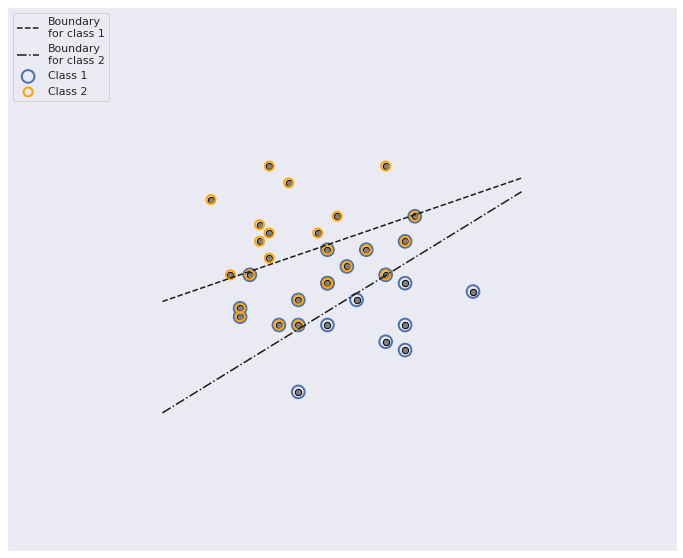

In [ ]:
zero_class = np.where(preds[:, 0])
one_class = np.where(preds[:, 1])

plt.figure(figsize=(12, 10))
plt.scatter(xtest[:, 0], xtest[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
plt.scatter(xtest[zero_class, 0], xtest[zero_class, 1], s=160, edgecolors='b',
            facecolors='none', linewidths=2, label='Class 1')
plt.scatter(xtest[one_class, 0], xtest[one_class, 1], s=80, edgecolors='orange',
            facecolors='none', linewidths=2, label='Class 2')

min_x = np.min(x[:, 0])
max_x = np.max(x[:, 0])
min_y = np.min(x[:, 1])
max_y = np.max(x[:, 1])
plot_hyperplane(model.estimators_[0], min_x, max_x, 'k--', 'Boundary\nfor class 1')
plot_hyperplane(model.estimators_[1], min_x, max_x, 'k-.', 'Boundary\nfor class 2')
plt.xticks(())
plt.yticks(())

plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
plt.legend(loc="upper left")

In this graph, we can see the classification of 3 different kind of instances:

- yellow
- blue
- yellow and blue.

Looking at the decision boundaries, we can see how the model correctly separated all of them.